### Image Prediction Analysis

This notebook provides a close-up examination of the images that each experimental trial predicts correctly and incorrectly.  It then offers a comparative analysis to look for trends and conclusions.


##### Import Libraries and Modules

In [19]:
from ast import literal_eval
import os
import re
import pandas as pd
from glob import glob
from pathlib import Path
from collections import Counter 
import numpy as np
import torchvision
from PIL import Image
import seaborn as sns
import pickle
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

pd.set_option('display.max_rows', 500)

##### Retrieve Results from directory

In [3]:
search_path = "../model_results"
file_extension = "*.csv"

dfs = []
[dfs.append(pd.read_csv(file, index_col=0))
 for path, subdir, files in os.walk(search_path)
 for file in glob(os.path.join(path, file_extension))]

df_orig = pd.concat(dfs, ignore_index=True)
df_orig['Accuracy'] = df_orig['Accuracy'].apply(lambda x: x*100)
#df_orig['Original_CI'] = df_orig.Original_CI.apply(lambda x: literal_eval(x))
#df_orig['Orig_CI_Low'], df_orig['Orig_CI_Hi'] = zip(*df_orig.Original_CI)

# Filter data into subsets based on test dataset used
df_orig_cifar10 = df_orig[df_orig['Testset'] == 'cifar10']
df_orig_cifar101 = df_orig[df_orig['Testset'] == 'cifar10.1']

In [4]:
df_orig.head()

,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI,Original_Accuracy_300epochs,Original_CI_300epochs
0,densenet_BC_100_12_ra_2_5,400,cifar10,0.5266,89.52,95.5,"(95.1, 95.9)",NaN,NaN
1,densenet_BC_100_12_ra_2_5,300,cifar10,0.5074,89.52,95.5,"(95.1, 95.9)",NaN,NaN
2,densenet_BC_100_12_ra_2_5,400,cifar10.1,1.1600,77.10,87.6,"(86.1, 89.0)",NaN,NaN
3,densenet_BC_100_12_ra_2_5,300,cifar10.1,1.1392,77.60,87.6,"(86.1, 89.0)",NaN,NaN
4,densenet_BC_100_12_ra_2_5_refined400,50,cifar10.1,0.6393,84.70,87.6,"(86.1, 89.0)",NaN,NaN


In [4]:
final_score_subset = df_orig[['Model', 'Accuracy', 'Testset']].sort_values(by=['Model'])

# Remove models that we did not run randaugment datasets through
final_score_subset = final_score_subset[~final_score_subset["Model"].str.contains('resnet_basic_44')]
final_score_subset = final_score_subset[~final_score_subset["Model"].str.contains('pyramidnet_basic_110_84')]
final_score_subset = final_score_subset[~final_score_subset["Model"].str.contains('resnext_29_8x64d')]


final_score_subset['ra'] = final_score_subset['Model'].str.contains("ra_")

def ra_N_extraction(row):
    p3 = re.compile("ra_(\d+)_(\d+)")
    N=0 
    if row['ra'] == True :
        srch3 = p3.search(row['Model'].lower())
        N = int(srch3.group(1))
    return N

def ra_M_extraction(row):
    p3 = re.compile("ra_(\d+)_(\d+)")
    M=0 
    if row['ra'] == True :
        srch3 = p3.search(row['Model'].lower())
        M = int(srch3.group(2))
    return M

final_score_subset['N'] = final_score_subset.apply(lambda row: ra_N_extraction(row), axis=1)
final_score_subset['M'] = final_score_subset.apply(lambda row: ra_M_extraction(row), axis=1)
cols = ['N', 'M']
final_score_subset['hue'] = final_score_subset[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)


#final_score_subset[final_score_subset['Model'].str.contains("refined300")]
final_score_subset

,Model,Accuracy,Testset,ra,N,M,hue
101,densenet_BC_100_12,88.30,cifar10.1,False,0,0,0_0
99,densenet_BC_100_12,94.56,cifar10,False,0,0,0_0
98,densenet_BC_100_12,88.75,cifar10,False,0,0,0_0
100,densenet_BC_100_12,94.84,cifar10,False,0,0,0_0
48,densenet_BC_100_12_ra_2_20,79.00,cifar10,True,2,20,2_20
49,densenet_BC_100_12_ra_2_20,78.54,cifar10,True,2,20,2_20
51,densenet_BC_100_12_ra_2_20,62.75,cifar10.1,True,2,20,2_20
50,densenet_BC_100_12_ra_2_20,63.90,cifar10.1,True,2,20,2_20
29,densenet_BC_100_12_ra_2_20_c10val,67.45,cifar10.1,True,2,20,2_20
28,densenet_BC_100_12_ra_2_20_c10val,68.15,cifar10.1,True,2,20,2_20


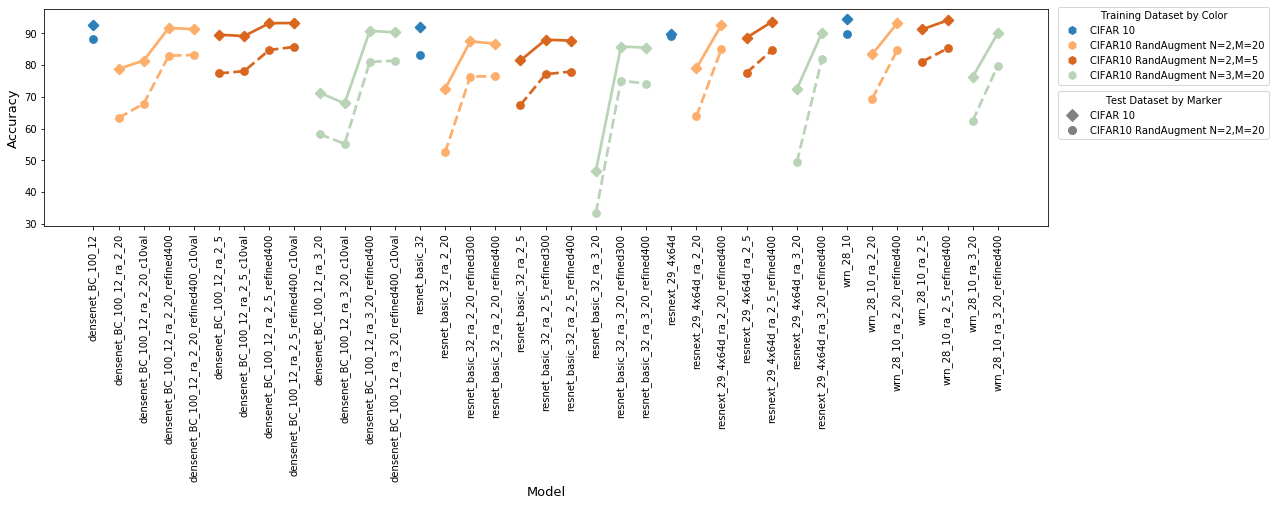

In [5]:
flatui = ["#2c7fb8", "#fdae6b", "#D9661F", "#B9D3B6", "#B9D3B6", "#859438"]
#sns.palplot(sns.color_palette(flatui))


f, ax = plt.subplots(figsize=(18, 4))
sp = sns.pointplot(x="Model", hue="hue", y="Accuracy", data=final_score_subset[final_score_subset['Testset'] == 'cifar10'], 
                   markers=['D'] * 4, linestyles=['-']*4, palette=flatui, ci=None)  
plt.xlabel('Model', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
#plt.title("Model Accuracy", fontsize=16)
plt.setp(ax.get_xticklabels(), rotation=90)
sns.set_style()

sp = sns.pointplot(x="Model", hue="hue", y="Accuracy", data=final_score_subset[final_score_subset['Testset'] == 'cifar10.1'], 
                   markers=['o']*4, linestyles=['--']*4, palette=flatui, ci=None,alpha=0.7) # and slightly transparent

#[0, 1, 2, 3, 4, u'D', 6, 7, 8, u's', u'|', 11, u'None', u'P', 9, u'x', u'X', 5, u'_', u'^', u' ', 
# None, u'd', u'h', u'+', u'*', u',', u'o', u'.', u'1', u'p', u'3', u'2', u'4', u'H', u'v', u'', u'8', 10, u'&lt;', u'&gt;']


train_datasets = ['CIFAR 10', 'CIFAR10 RandAugment N=2,M=20', 'CIFAR10 RandAugment N=2,M=5', 'CIFAR10 RandAugment N=3,M=20']
test_datasets = ['CIFAR 10', 'CIFAR 10.1']

h = [plt.plot([],[], color=c, marker="h", ms=8, ls="")[0] for i,c in zip(train_datasets, flatui)]
leg = ax.legend(handles=h, labels=train_datasets,loc=(1.01,0.65), title="Training Dataset by Color")
ax.add_artist(leg)

h2 = [plt.plot([],[], color='grey', marker=m, ms=8, ls="")[0] for i,m in zip(test_datasets, ['D', 'o'])]
ax.legend(handles=h2, labels=train_datasets,loc=(1.01,0.4), title="Test Dataset by Marker")

# os.chdir('/home/ec2-user/SageMaker/')
# plt.savefig('error-by-token-type.png')

pass

In [7]:
# Retrieve the official labels of the CIFAR10 test dataset
testset = torchvision.datasets.CIFAR10(root='../../data/cifar10/', train=False,
                                       download=True)
test_labels_CIFAR10 = testset.targets
test_data_CIFAR10 = testset.data

# Download CIFAR-10 training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=None)

# Retrieve the official labels of the CIFAR10.1 test dataset
test_labels_CIFAR101 =np.load('../data/cifar101/cifar10.1_v6_labels.npy')  
test_data_CIFAR101 = np.load('../data/cifar101/cifar10.1_v6_data.npy')

# Create a dictionary that maps numeric class number to class name
class_dict = {0: "airplane",
              1: "automobile",
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck"
}

classes = ['0 airplane', '1 automobile', '2 bird', '3 cat', '4  deer', '5 dog', '6 frog', 
           '7 horse', '8 ship', '9 truck']

# Confirm that when we compare these labels to our guesses, we get the accuracy score.
def confirm_score(zfile, test_labels):
    print("\nAccuracy:", zfile['acc'])
    print(" -> Sanity Check:", np.sum(test_labels_CIFAR10 == zfile['labels']), "of", 
          len(test_labels), "correct\n")
    
    # Examine the classes to see if the model is balanced in its accuracy across all labels 
    report = classification_report(test_labels, zfile['labels'], target_names=classes, output_dict=True)
    print(pd.DataFrame(report).transpose())


Files already downloaded and verified


Extracting ./data/cifar-10-python.tar.gz to ./data


## Results Analysis

##### Import all of the prediction results from the github subdirectory

In [8]:
to_be_101_df = []
to_be_10_df = []

p1 = re.compile("predictions_(.+?)(_cifar101){0,1}.npz")
p2 = re.compile("([\d]+)(_refined)?(\d*)")
p3 = re.compile("ra_(\d+)_(\d+)")

for path in Path('../model_results').rglob('*.npz'):
    model = str(path.parent)
    srch1 = p1.search((path.name).lower())
    g1 = srch1.group(1)
    epochs, refined_epochs = 0, 0
    N, M = 0, 0 
    
    if 'refined' in g1:
        epochs = 400
        srch2 = p2.search(g1, re.IGNORECASE)
        if srch2.group(2) != None:
            refined_epochs = srch2.group(3)
        else:
            refined_epochs = srch2.group(1)

    else:
        epochs = g1   
    
    testset = 'cifar101' in (path.name).lower()
    rand_aug = "ra_" in str(path.parent).lower()
    refined = "refined" in (path.name).lower()
    npzf = np.load(path)
    
    if rand_aug:
        srch3 = p3.search(model.lower())
        N = int(srch3.group(1))
        M = int(srch3.group(2))
        
    if testset:
        # Remove if statement once correct file is checked in for this dataset
        #if str(path) not in 'resnet_basic_32_ra_2_20/predictions_400_CIFAR101.npz':
        result_by_img = test_labels_CIFAR101 == npzf['labels']
        to_be_101_df.append([model,testset,rand_aug,int(epochs),int(refined_epochs), N, M] + result_by_img.tolist())
    else:
        result_by_img = test_labels_CIFAR10 == npzf['labels']
        to_be_10_df.append([model,testset,rand_aug,int(epochs),int(refined_epochs), N, M] 
                           + result_by_img.tolist())
        
        
results_cifar101 = pd.DataFrame(to_be_101_df) 
results_cifar101.rename(columns=lambda x: 'img' + str(x-7), inplace=True)
results_cifar101.rename(columns = {'img-7':"model", 'img-6':"cifar101", 'img-5':"randaug",
                                   'img-4':"epochs", 'img-3':"refined_epochs",
                                   'img-2':"N", 'img-1':"M"
                                  }, inplace=True)

results_cifar10 = pd.DataFrame(to_be_10_df) 
results_cifar10.rename(columns=lambda x: 'img' + str(x-7), inplace=True)
results_cifar10.rename(columns = {'img-7':"model", 'img-6':"cifar101", 'img-5':"randaug",
                                  'img-4':"epochs", 'img-3':"refined_epochs",
                                  'img-2':"N", 'img-1':"M"
                                 }, inplace=True)


In [9]:
results_cifar101 = results_cifar101[results_cifar101.groupby(['model'])['epochs']
                                    .transform(max) == results_cifar101['epochs']]
results_cifar10 = results_cifar10[results_cifar10.groupby(['model'])['epochs']
                                    .transform(max) == results_cifar10['epochs']]

In [11]:
print("CIFAR10 len:", len(results_cifar10), "CIFAR10.1 len:", len(results_cifar101))
results_cifar10.head()

CIFAR10 len: 83 CIFAR10.1 len: 83


,model,cifar101,randaug,epochs,refined_epochs,N,M,img0,img1,img2,...,img9990,img9991,img9992,img9993,img9994,img9995,img9996,img9997,img9998,img9999
0,../model_results/densenet_BC_100_12_ra_2_5,False,True,400,50,2,5,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,../model_results/densenet_BC_100_12_ra_2_5,False,True,400,0,2,5,True,True,True,...,True,True,True,False,True,True,True,True,True,True
2,../model_results/densenet_BC_100_12_ra_3_20_c1...,False,True,400,50,3,20,True,True,True,...,True,True,True,False,True,True,True,True,True,True
3,../model_results/densenet_BC_100_12_ra_3_20_c1...,False,True,400,0,3,20,True,True,True,...,False,True,False,True,False,False,False,True,True,True
4,../model_results/resnext_29_4x64d_ra_2_20_c10val,False,True,400,50,2,20,True,True,True,...,True,True,True,True,True,True,True,True,True,True


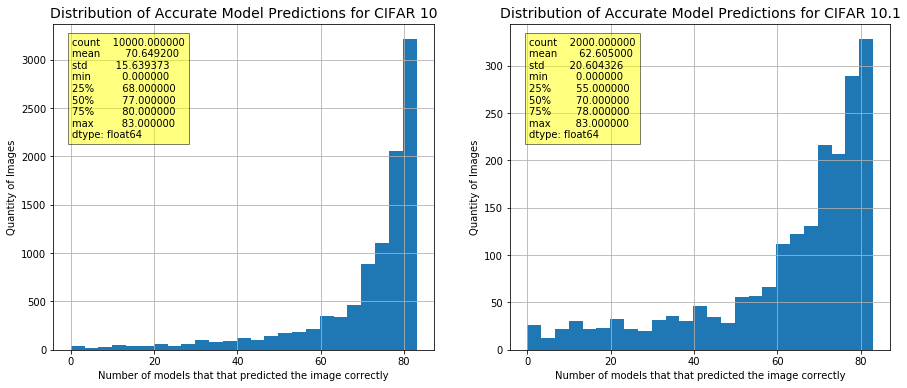

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

imgs = [col for col in results_cifar10.columns if 'img' in col]
img_preds10 = results_cifar10[imgs].sum(axis=0)
img_preds10.hist(ax=ax1,bins=25)
ax1.set_xlabel('Number of models that that predicted the image correctly')
ax1.set_ylabel('Quantity of Images')
ax1.set_title('Distribution of Accurate Model Predictions for CIFAR 10', fontsize=14)
ax1.annotate(str(img_preds10.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))


imgs = [col for col in results_cifar101.columns if 'img' in col]
img_preds101 = results_cifar101[imgs].sum(axis=0)
img_preds101.hist(ax=ax2,bins=25)
ax2.set_xlabel('Number of models that that predicted the image correctly')
ax2.set_ylabel('Quantity of Images')
ax2.set_title('Distribution of Accurate Model Predictions for CIFAR 10.1', fontsize=14)
ax2.annotate(str(img_preds101.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))

pass

In [13]:
def print_imgs(testset, testlabels, img_indexes):
    
    images_to_print = []
    stats = []
    
    for ii in img_indexes:
        ii = int(ii[3:])
        img_dict = {'correct_label': testlabels[ii],
                    'correct_label_id': class_dict[testlabels[ii]],
                    'img_index': ii
                   }
        
        img=Image.fromarray(testset[ii])
        images_to_print.append(img)
        
        stats.append(class_dict[testlabels[ii]])

    # Print the misclassified images
    wrong = len(img_indexes)
    last_row = [1 if wrong % 10 != 0 else 0]
    whole_rows = wrong // 10
    
    fig = plt.figure(figsize=(8 * (whole_rows + 1), 2 * (whole_rows + 1)))
    grid = ImageGrid(fig, 111,  
                     nrows_ncols=(whole_rows + 1, 10),  
                     axes_pad=0.1,  
                     )

    for ax, im in zip(grid, images_to_print):
        # Iterating over the grid returns the Axes
        ax.imshow(im)
        
    print("Correct Labels by Row:")
    print("\n".join([" ".join(stats[i:i+10]) for i in range(0,len(stats),10)]))

### Aggregate Results for All Models
#### Images that every model missed

###### CIFAR 10.1

On CIFAR 10.1, 8 were misclassified by every model. That is 0.004 percent of the dataset.

Correct Labels by Row:
automobile automobile automobile automobile automobile cat dog horse


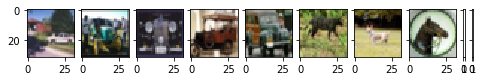

In [20]:
# Print the images that no model got right
zero = img_preds101[img_preds101 == 0]
print("On CIFAR 10.1,", len(zero), "were misclassified by every model. That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())

##### CIFAR 10

On CIFAR 10, 21 were misclassified by every model. That is 0.0021 percent of the dataset.

Correct Labels by Row:
airplane frog truck dog cat dog frog truck horse horse
truck truck cat truck horse dog cat cat automobile bird
automobile


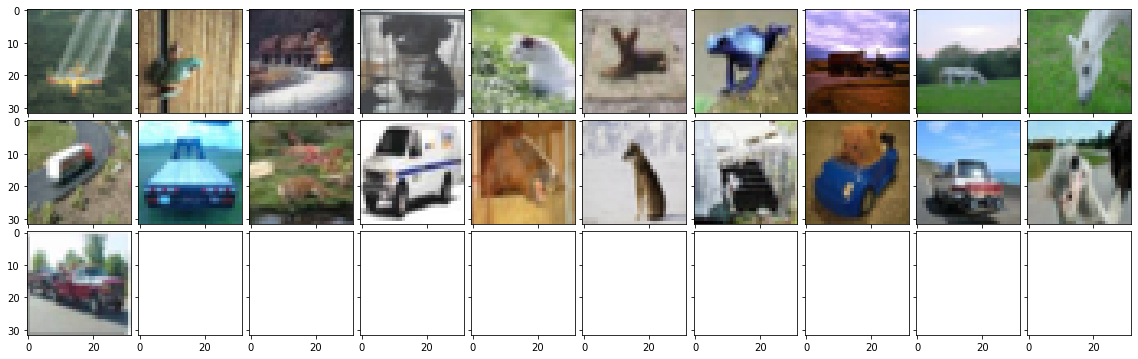

In [17]:
# Print the images that no model got right
zero = img_preds10[img_preds10 == 0]
print("On CIFAR 10,", len(zero), "were misclassified by every model. That is", \
      len(zero)/len(test_labels_CIFAR10), "percent of the dataset.\n")
print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())

#### Images that 5 models or less predicted correctly

##### CIFAR 10.1

In [ ]:
# Print the images that 5 models or less got right
threshold = 5
zero = img_preds101[img_preds101 <= threshold]
print("On CIFAR 10.1,", len(zero), "were misclassified by 0 -", threshold, "models. That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())

##### CIFAR 10

In [ ]:
# Print the images that 5 models or less got right
threshold = 5
zero = img_preds10[img_preds10 <= threshold]
print("On CIFAR 10,", len(zero), "were misclassified by 0 -", threshold, "models. That is", \
      len(zero)/len(test_labels_CIFAR10), "percent of the dataset.\n")
print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())

#### Images that 34 or more models got right

##### CIFAR 10

In [ ]:
# Print the images that 34 models or more got right
threshold = 34
zero = img_preds101[img_preds101 >= threshold]
print("On CIFAR 10.1,", len(zero), "were classified correctly by", threshold, "or more model(s). That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
#print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())

##### CIFAR 10

In [ ]:
# Print the images that 34 models or more got right
threshold = 34
zero = img_preds10[img_preds10 >= threshold]
print("On CIFAR 10,", len(zero), "were classified correctly by", threshold, "or more model(s). That is", \
      len(zero)/len(test_labels_CIFAR10), "percent of the dataset.\n")
#print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())

### Results for Models Trained on Unaugmented Data)

In [106]:
results_cifar10_noaug = results_cifar10[results_cifar10["randaug"]==False]
results_cifar101_noaug = results_cifar101[results_cifar101["randaug"]==False]
print("CIFAR10 len:", len(results_cifar10_noaug), "CIFAR10.1 len:", len(results_cifar101_noaug))

CIFAR10 len: 7 CIFAR10.1 len: 7


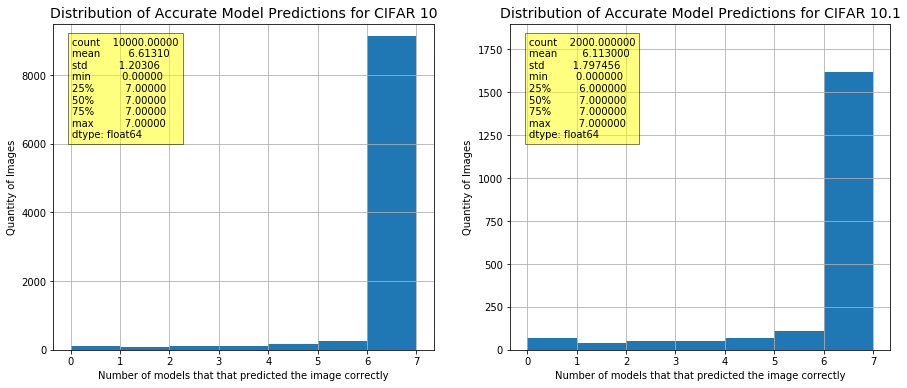

In [114]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

imgs = [col for col in results_cifar10_noaug.columns if 'img' in col]
img_preds10 = results_cifar10_noaug[imgs].sum(axis=0)
img_preds10.hist(ax=ax1,bins=7)
ax1.set_xlabel('Number of models that that predicted the image correctly')
ax1.set_ylabel('Quantity of Images')
ax1.set_title('Distribution of Accurate Model Predictions for CIFAR 10', fontsize=14)
ax1.annotate(str(img_preds10.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))


imgs = [col for col in results_cifar101_noaug.columns if 'img' in col]
img_preds101 = results_cifar101_noaug[imgs].sum(axis=0)
img_preds101.hist(ax=ax2,bins=7)
ax2.set_xlabel('Number of models that that predicted the image correctly')
ax2.set_ylabel('Quantity of Images')
ax2.set_title('Distribution of Accurate Model Predictions for CIFAR 10.1', fontsize=14)
ax2.annotate(str(img_preds101.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))

c10_ymax = 9500
c101_ymax = 1900

ax1.set_ylim(0,c10_ymax)
ax2.set_ylim(0,c101_ymax)

pass

#### Images that every model missed

###### CIFAR 10.1

In [83]:
# Print the images that no model got right
zero = img_preds101[img_preds101 == 0]
print("On CIFAR 10.1,", len(zero), "were misclassified by every model. That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())
unaug_cifar101_allwrong = zero.index

On CIFAR 10.1, 68 were misclassified by every model. That is 0.034 percent of the dataset.



In [84]:
zero = img_preds10[img_preds10 == 0]
print("On CIFAR 10,", len(zero), "were misclassified by every model. That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())
unaug_cifar10_allwrong = zero.index

On CIFAR 10, 105 were misclassified by every model. That is 0.0525 percent of the dataset.



#### Images that X models or less predicted correctly

##### CIFAR 10

In [22]:
# Print the images that at least X models got right
threshold = 7
zero = img_preds10[img_preds10 >= threshold]
print("On CIFAR 10,", len(zero), "were classified correctly by", threshold, "or more model(s). That is", \
      len(zero)/len(test_labels_CIFAR10), "percent of the dataset.\n")
#print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())
unaug_cifar10_allright = zero.index

On CIFAR 10, 8583 were classified correctly by 7 or more model(s). That is 0.8583 percent of the dataset.



##### CIFAR 10.1

In [23]:
# Print the images that at least X models got right
threshold = 7
zero = img_preds101[img_preds101 >= threshold]
print("On CIFAR 10.1,", len(zero), "were classified correctly by", threshold, "or more model(s). That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
#print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())
unaug_cifar101_allright = zero.index

On CIFAR 10.1, 1426 were classified correctly by 7 or more model(s). That is 0.713 percent of the dataset.



### Results for Models Trained on Augmented Data
#### Images that every model missed

###### CIFAR 10.1

In [115]:
results_cifar10_aug = results_cifar10[results_cifar10["randaug"]==True]
results_cifar101_aug = results_cifar101[results_cifar101["randaug"]==True]
print("CIFAR10 len:", len(results_cifar10_aug), "CIFAR10.1 len:", len(results_cifar101_aug))

CIFAR10 len: 30 CIFAR10.1 len: 30


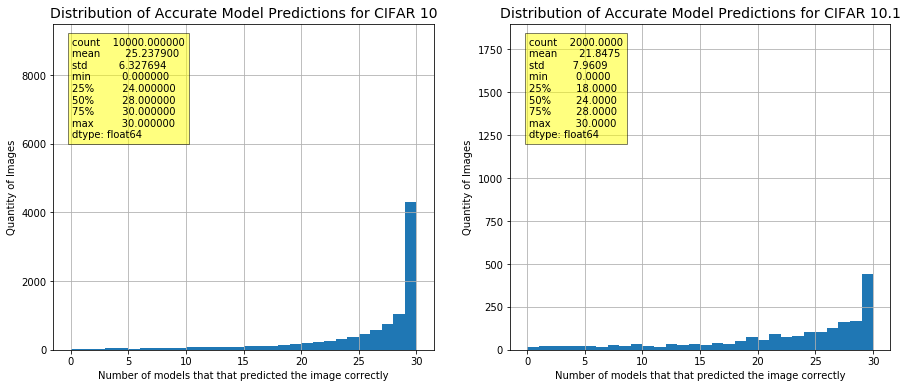

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

imgs = [col for col in results_cifar10_aug.columns if 'img' in col]
img_preds10 = results_cifar10_aug[imgs].sum(axis=0)
img_preds10.hist(ax=ax1,bins=30)
ax1.set_xlabel('Number of models that that predicted the image correctly')
ax1.set_ylabel('Quantity of Images')
ax1.set_title('Distribution of Accurate Model Predictions for CIFAR 10', fontsize=14)
ax1.annotate(str(img_preds10.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))


imgs = [col for col in results_cifar101_aug.columns if 'img' in col]
img_preds101 = results_cifar101_aug[imgs].sum(axis=0)
img_preds101.hist(ax=ax2,bins=30)
ax2.set_xlabel('Number of models that that predicted the image correctly')
ax2.set_ylabel('Quantity of Images')
ax2.set_title('Distribution of Accurate Model Predictions for CIFAR 10.1', fontsize=14)
ax2.annotate(str(img_preds101.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))

ax1.set_ylim(0,c10_ymax)
ax2.set_ylim(0,c101_ymax)
pass

#### Images that every model missed

###### CIFAR 10.1

In [26]:
# Print the images that no model got right
zero = img_preds101[img_preds101 == 0]
print("On CIFAR 10.1,", len(zero), "were misclassified by every model. That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())

On CIFAR 10.1, 19 were misclassified by every model. That is 0.0095 percent of the dataset.



###### CIFAR 10

In [27]:
zero = img_preds10[img_preds10 == 0]
print("On CIFAR 10,", len(zero), "were misclassified by every model. That is", \
      len(zero)/len(test_labels_CIFAR10), "percent of the dataset.\n")
print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())

On CIFAR 10, 37 were misclassified by every model. That is 0.0037 percent of the dataset.



#### Images that at least X models predicted correctly

###### CIFAR 10

In [16]:
# Print the images that no model got right
threshold = 29
zero = img_preds10[img_preds10 >= threshold]
print("On CIFAR 10,", len(zero), "were classified correctly by", threshold, "or more model(s). That is", \
      len(zero)/len(test_labels_CIFAR10), "percent of the dataset.\n")
#print_imgs(test_data_CIFAR10, test_labels_CIFAR10, zero.keys())

On CIFAR 10, 9633 were classified correctly by 29 or more model(s). That is 0.9633 percent of the dataset.



###### CIFAR 10.1

In [29]:
# Print the images that no model got right
threshold = 29
zero = img_preds101[img_preds101 >= threshold]
print("On CIFAR 10.1,", len(zero), "were classified correctly by", threshold, "or more model(s). That is", \
      len(zero)/len(test_labels_CIFAR101), "percent of the dataset.\n")
#print_imgs(test_data_CIFAR101, test_labels_CIFAR101, zero.keys())

On CIFAR 10.1, 442 were classified correctly by 29 or more model(s). That is 0.221 percent of the dataset.



## Focus on N=2, M=5

In [96]:
results_cifar10_2x5 = results_cifar10[(results_cifar10["N"]==2) & (results_cifar10["M"]==5)]
results_cifar101_2x5 = results_cifar101[(results_cifar101["N"]==2) & (results_cifar101["M"]==5)]
print("CIFAR10 len:", len(results_cifar10_2x5), "CIFAR10.1 len:", len(results_cifar101_2x5))

CIFAR10 len: 10 CIFAR10.1 len: 10


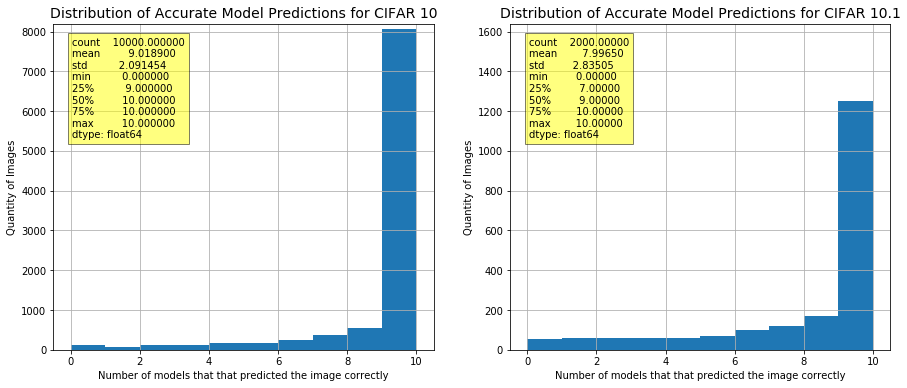

In [98]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

c10_ymax = 8200
c101_ymax = 1640

imgs = [col for col in results_cifar10_2x5.columns if 'img' in col]
img_preds10 = results_cifar10_2x5[imgs].sum(axis=0)
img_preds10.hist(ax=ax1,bins=10)
ax1.set_xlabel('Number of models that that predicted the image correctly')
ax1.set_ylabel('Quantity of Images')
ax1.set_title('Distribution of Accurate Model Predictions for CIFAR 10', fontsize=14)
ax1.annotate(str(img_preds10.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))
ax1.set_ylim(0,c10_ymax)


imgs = [col for col in results_cifar101_2x5.columns if 'img' in col]
img_preds101 = results_cifar101_2x5[imgs].sum(axis=0)
img_preds101.hist(ax=ax2,bins=10)
ax2.set_xlabel('Number of models that that predicted the image correctly')
ax2.set_ylabel('Quantity of Images')
ax2.set_title('Distribution of Accurate Model Predictions for CIFAR 10.1', fontsize=14)
ax2.annotate(str(img_preds101.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))
ax2.set_ylim(0,c101_ymax)
pass

## Focus on N=2, M=20

In [100]:
results_cifar10_2x20 = results_cifar10[(results_cifar10["N"]==2) & (results_cifar10["M"]==20)]
results_cifar101_2x20 = results_cifar101[(results_cifar101["N"]==2) & (results_cifar101["M"]==20)]
print("CIFAR10 len:", len(results_cifar10_2x20), "CIFAR10.1 len:", len(results_cifar101_2x20))

CIFAR10 len: 10 CIFAR10.1 len: 10


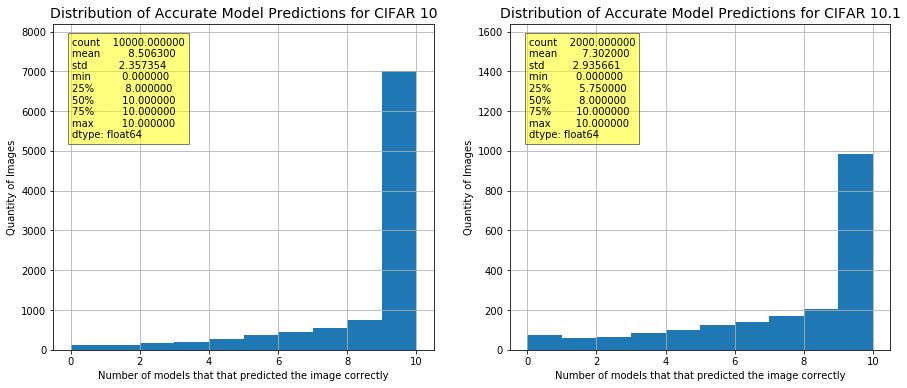

In [101]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

imgs = [col for col in results_cifar10_2x20.columns if 'img' in col]
img_preds10 = results_cifar10_2x20[imgs].sum(axis=0)
img_preds10.hist(ax=ax1,bins=10)
ax1.set_xlabel('Number of models that that predicted the image correctly')
ax1.set_ylabel('Quantity of Images')
ax1.set_title('Distribution of Accurate Model Predictions for CIFAR 10', fontsize=14)
ax1.annotate(str(img_preds10.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))


imgs = [col for col in results_cifar101_2x20.columns if 'img' in col]
img_preds101 = results_cifar101_2x20[imgs].sum(axis=0)
img_preds101.hist(ax=ax2,bins=10)
ax2.set_xlabel('Number of models that that predicted the image correctly')
ax2.set_ylabel('Quantity of Images')
ax2.set_title('Distribution of Accurate Model Predictions for CIFAR 10.1', fontsize=14)
ax2.annotate(str(img_preds101.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))

ax1.set_ylim(0,c10_ymax)
ax2.set_ylim(0,c101_ymax)
pass

## Focus on N=3,M=20

In [102]:
results_cifar10_3x20 = results_cifar10[(results_cifar10["N"]==3) & (results_cifar10["M"]==20)]
results_cifar101_3x20 = results_cifar101[(results_cifar101["N"]==3) & (results_cifar101["M"]==20)]
print("CIFAR10 len:", len(results_cifar101_3x20), "CIFAR10.1 len:", len(results_cifar101_3x20))

CIFAR10 len: 10 CIFAR10.1 len: 10


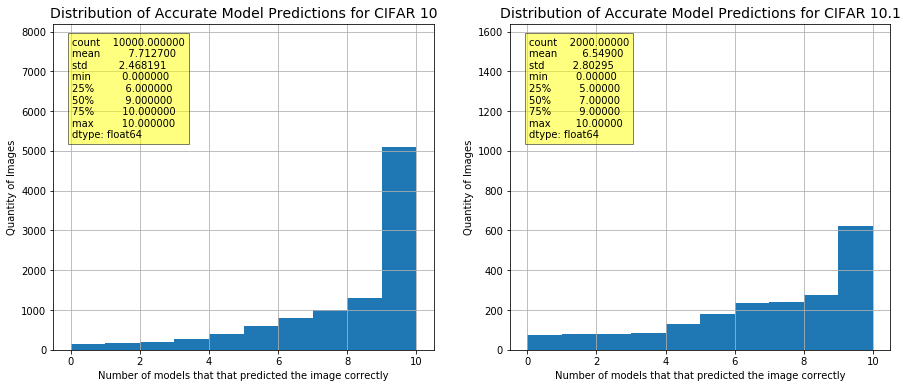

In [104]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 6))

imgs = [col for col in results_cifar10_3x20.columns if 'img' in col]
img_preds10 = results_cifar10_3x20[imgs].sum(axis=0)
img_preds10.hist(ax=ax1,bins=10)
ax1.set_xlabel('Number of models that that predicted the image correctly')
ax1.set_ylabel('Quantity of Images')
ax1.set_title('Distribution of Accurate Model Predictions for CIFAR 10', fontsize=14)
ax1.annotate(str(img_preds10.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))


imgs = [col for col in results_cifar101_3x20.columns if 'img' in col]
img_preds101 = results_cifar101_3x20[imgs].sum(axis=0)
img_preds101.hist(ax=ax2,bins=10)
ax2.set_xlabel('Number of models that that predicted the image correctly')
ax2.set_ylabel('Quantity of Images')
ax2.set_title('Distribution of Accurate Model Predictions for CIFAR 10.1', fontsize=14)
ax2.annotate(str(img_preds101.describe()), xy=(0.05, 0.65), xycoords='axes fraction',
             backgroundcolor='w', bbox = dict(facecolor='yellow', alpha=0.5))

ax1.set_ylim(0,c10_ymax)
ax2.set_ylim(0,c101_ymax)
pass